In [1]:
import pandas as pd
import datetime
import re
import requests
import bs4
import matplotlib.pyplot as plt
#import matplotlib
from IPython.display import display, HTML
import numpy as np

In [2]:
# Plot Covid data from WHO


In [3]:
df_who = pd.read_json (r'data-who/covidwho.json')

In [4]:
df_who.head()

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
1,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
2,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
3,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
4,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN


In [5]:
df_who_Germany = df_who[df_who['Country'] =="Germany"]
df_who_Germany

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
9629,Germany,DE,51.17,10.45,0,0,0,0,2020-01-22 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9630,Germany,DE,51.17,10.45,0,0,0,0,2020-01-23 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9631,Germany,DE,51.17,10.45,0,0,0,0,2020-01-24 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9632,Germany,DE,51.17,10.45,0,0,0,0,2020-01-25 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9633,Germany,DE,51.17,10.45,0,0,0,0,2020-01-26 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,Germany,DE,51.17,10.45,91159,1275,24575,0,2020-04-03 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9702,Germany,DE,51.17,10.45,96092,1444,26400,0,2020-04-04 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9703,Germany,DE,51.17,10.45,100123,1584,28700,0,2020-04-05 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9704,Germany,DE,51.17,10.45,103374,1810,28700,0,2020-04-06 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN


In [6]:
df_who_Italy = df_who[df_who['Country'] =="Italy"]
df_who_Italy

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
11092,Italy,IT,41.87,12.57,0,0,0,0,2020-01-22 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
11093,Italy,IT,41.87,12.57,0,0,0,0,2020-01-23 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
11094,Italy,IT,41.87,12.57,0,0,0,0,2020-01-24 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
11095,Italy,IT,41.87,12.57,0,0,0,0,2020-01-25 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
11096,Italy,IT,41.87,12.57,0,0,0,0,2020-01-26 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11164,Italy,IT,41.87,12.57,119827,14681,19758,0,2020-04-03 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
11165,Italy,IT,41.87,12.57,124632,15362,20996,0,2020-04-04 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
11166,Italy,IT,41.87,12.57,128948,15887,21815,0,2020-04-05 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN
11167,Italy,IT,41.87,12.57,132547,16523,22837,0,2020-04-06 00:00:00+00:00,5bb4a80b-f42d-4622-b55e-bfcc9d24c574,NaN,NaN,NaN


In [7]:
df_who_Spain = df_who[df_who['Country'] =="Spain"]
df_who_Spain

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
16870,Spain,ES,40.46,-3.75,0,0,0,0,2020-01-22 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
16871,Spain,ES,40.46,-3.75,0,0,0,0,2020-01-23 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
16872,Spain,ES,40.46,-3.75,0,0,0,0,2020-01-24 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
16873,Spain,ES,40.46,-3.75,0,0,0,0,2020-01-25 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
16874,Spain,ES,40.46,-3.75,0,0,0,0,2020-01-26 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,Spain,ES,40.46,-3.75,119199,11198,30513,0,2020-04-03 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
16943,Spain,ES,40.46,-3.75,126168,11947,34219,0,2020-04-04 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
16944,Spain,ES,40.46,-3.75,131646,12641,38080,0,2020-04-05 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN
16945,Spain,ES,40.46,-3.75,136675,13341,40437,0,2020-04-06 00:00:00+00:00,b4241151-a623-4529-ac08-9ff297410543,NaN,NaN,NaN


/home/bita/anaconda3/envs/backpack1/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


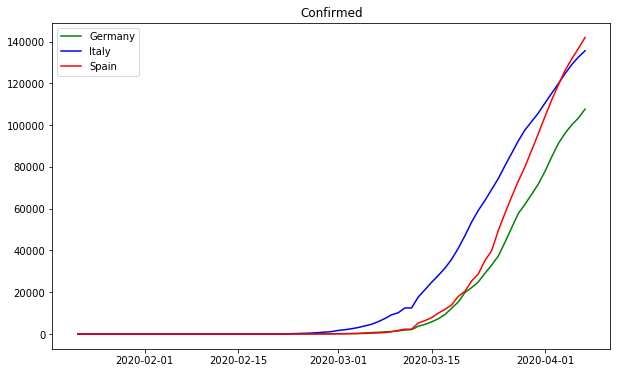

In [8]:

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(df_who_Germany['Date'], df_who_Germany['Confirmed'], zorder=1 , color="g",label = "Germany")
plt.plot(df_who_Italy['Date'], df_who_Italy['Confirmed'], zorder=2 , color="b" , label = "Italy")
plt.plot(df_who_Spain['Date'], df_who_Spain['Confirmed'], zorder=3 , color="r", label = "Spain")
ax.set_title("Confirmed")

plt.legend(loc="upper left");

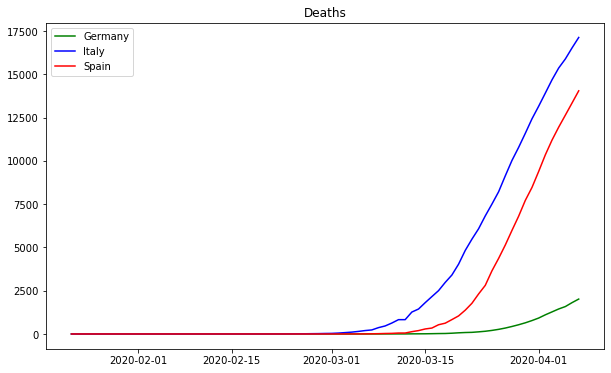

In [9]:

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(df_who_Germany['Date'], df_who_Germany['Deaths'], zorder=1 , color="g",label = "Germany")
plt.plot(df_who_Italy['Date'], df_who_Italy['Deaths'], zorder=2 , color="b", label = "Italy")
plt.plot(df_who_Spain['Date'], df_who_Spain['Deaths'], zorder=3 , color="r", label = "Spain")
ax.set_title("Deaths")

plt.legend(loc="upper left");

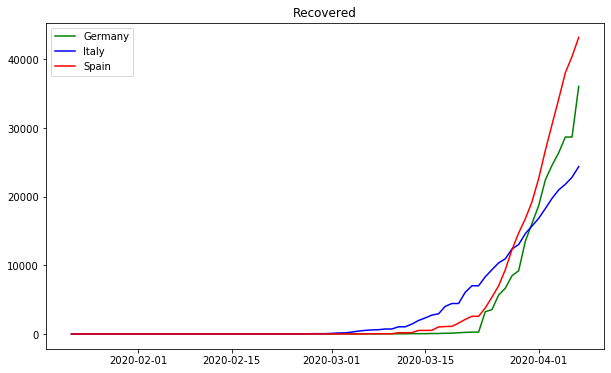

In [10]:

fig, ax = plt.subplots(figsize=(10,6))

plt.plot(df_who_Germany['Date'], df_who_Germany['Recovered'], zorder=1 , color="g",label = "Germany")
plt.plot(df_who_Italy['Date'], df_who_Italy['Recovered'], zorder=2 , color="b", label = "Italy")
plt.plot(df_who_Spain['Date'], df_who_Spain['Recovered'], zorder=3 , color="r", label = "Spain")
ax.set_title("Recovered")

plt.legend(loc="upper left");

In [11]:
# Selected Countries for the Analysis

In [12]:

#countries_sel = ["Germany","Italy","Spain","Malta"]
#from HDI Index
countries_sel = ["Norway", "Ireland", "Germany","Sweden","Netherlands","Denmark","Finland","United Kingdo",
                 "Belgium","Austria", "Luxembourg","Sloenia","Spain","France","Czechia","Malta","Estonia","Italy","Cyprus","Greece",
    "Lithuania","Poland","Slovakia","Latvia","Portugal","Hungary","Croatia","Bulgaria","Romania"]



In [13]:
# Plot HDI Score

In [14]:
hdi_score = pd.read_csv('data_HDI_EU.csv')

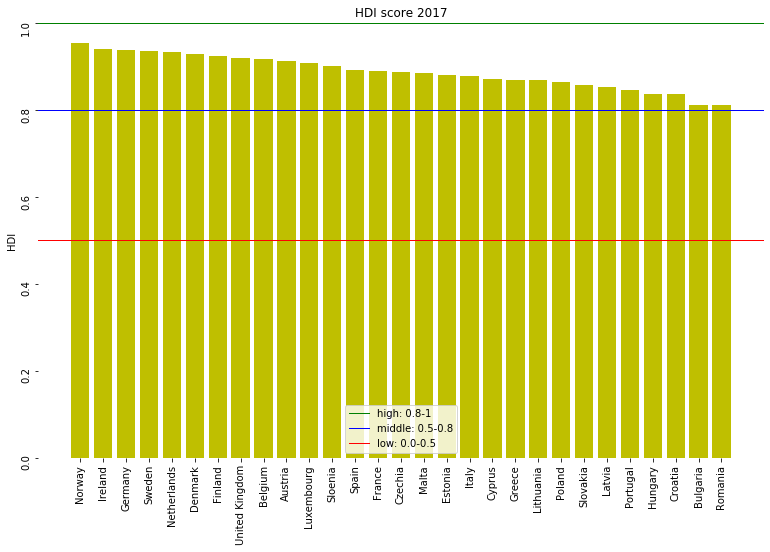

In [15]:
#hdi_score.set_index("geo")
fig, ax = plt.subplots(figsize = (13,8))

ax.bar(hdi_score["geo"],
       hdi_score["HDI_score_2017"],
       color = 'y');
ax.tick_params(labelrotation=90)
ax.set_title("HDI score 2017")
ax.set_ylabel("HDI")
ax.set_frame_on(False)

plt.axhline(y=1, xmin=0.0, xmax=1, label = "high: 0.8-1", linewidth=1, color = 'g', );
plt.axhline(y=.8, xmin=0.0, xmax=1, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
plt.axhline(y=.5, xmin=0.0, xmax=1, label = "low: 0.0-0.5", linewidth=1, color = 'r', );

plt.legend(loc="lower center");

In [16]:
# Extract data from the last Date (7th of April)

df_who_lastday = df_who[df_who['Date'] =="2020-04-07 00:00:00+00:00"]


In [17]:
df_who_lastday

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
76,Afghanistan,AF,33.94,67.71,423,14,18,0,2020-04-07 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
153,Albania,AL,41.15,20.17,383,22,131,0,2020-04-07 00:00:00+00:00,07ef547a-c2a5-4279-8f24-0295e9c7fe7a,NaN,NaN,NaN
230,Algeria,DZ,28.03,1.66,1468,193,113,0,2020-04-07 00:00:00+00:00,e6bec38b-4eae-4ce4-bbaf-69f532c1bd5f,NaN,NaN,NaN
307,Andorra,AD,42.55,1.60,545,22,39,0,2020-04-07 00:00:00+00:00,9f52c049-2008-45d8-8f86-7c009e015d17,NaN,NaN,NaN
384,Angola,AO,-11.20,17.87,17,2,2,0,2020-04-07 00:00:00+00:00,8bba7786-aabb-423a-97a1-7140fa6dfe19,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
263241,Venezuela (Bolivarian Republic),VE,6.42,-66.59,165,7,65,0,2020-04-07 00:00:00+00:00,a10e89ba-91bb-42ca-b089-caa55cf10114,NaN,NaN,NaN
263318,Viet Nam,VN,14.06,108.28,249,0,123,0,2020-04-07 00:00:00+00:00,5d4d26ec-5215-4595-88c3-4f28d4580ebb,NaN,NaN,NaN
263322,Western Sahara,EH,24.22,-12.89,4,0,0,0,2020-04-07 00:00:00+00:00,71656d15-e630-4136-8205-87a14968d634,NaN,NaN,NaN
263399,Zambia,ZM,-13.13,27.85,39,1,7,0,2020-04-07 00:00:00+00:00,2b3f6ef0-a3bf-41a8-8a91-8b79d8c36105,NaN,NaN,NaN


In [18]:
#select countries from the list of countries (Countries that we like to study)

df_who_lastday_sel_none_unique = df_who_lastday[df_who_lastday.Country.str.contains('|'.join(countries_sel))]


In [19]:
df_who_lastday_sel_none_unique

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
1308,Austria,AT,47.52,14.55,12639,243,4046,0,2020-04-07 00:00:00+00:00,39ca28f2-2ade-49f4-9516-e9b8cd8f48e6,NaN,NaN,NaN
1847,Belgium,BE,50.50,4.47,22194,2035,4157,0,2020-04-07 00:00:00+00:00,1c49b6bb-1b83-4fe3-b536-da1731fe6953,NaN,NaN,NaN
2540,Bulgaria,BG,42.73,25.49,577,23,42,0,2020-04-07 00:00:00+00:00,de959b36-8cda-4645-9675-acc067f8fa56,NaN,NaN,NaN
7237,Croatia,HR,45.10,15.20,1282,18,167,0,2020-04-07 00:00:00+00:00,b43d07be-a945-4525-91a2-b1fb47d46c2f,NaN,NaN,NaN
7391,Cyprus,CY,35.13,33.43,494,9,47,0,2020-04-07 00:00:00+00:00,024ac3a0-b462-4db7-a25f-3774f3c34aaa,NaN,NaN,NaN
7697,Denmark,DK,56.26,9.50,5071,203,1491,0,2020-04-07 00:00:00+00:00,761966af-c2cf-4bd9-a375-2c4198cff021,NaN,NaN,NaN
7698,Denmark,DK,61.89,-6.91,184,0,120,0,2020-04-07 00:00:00+00:00,30de4fc1-5e6a-4ed1-a002-851db22be281,Faroe Islands,Faroe Islands,Faroe Islands
7699,Denmark,DK,71.71,-42.60,11,0,10,0,2020-04-07 00:00:00+00:00,a78d2a7d-88a8-40f0-a4df-86371ca41d7b,Greenland,Greenland,Greenland
8392,Estonia,EE,58.60,25.01,1149,21,69,0,2020-04-07 00:00:00+00:00,d255c144-46dc-4320-8265-0060fabcdee0,NaN,NaN,NaN
8623,Finland,FI,61.92,25.75,2308,34,300,0,2020-04-07 00:00:00+00:00,bc1adb31-d848-4cfd-a898-194fe9376367,NaN,NaN,NaN


In [20]:
# The list above had multiple values for e.g France (e.g. Reunio). We discard those Provinces...
df_who_lastday_sel = df_who_lastday_sel_none_unique[df_who_lastday_sel_none_unique['Province'].isna()]
df_who_lastday_sel



,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
1308,Austria,AT,47.52,14.55,12639,243,4046,0,2020-04-07 00:00:00+00:00,39ca28f2-2ade-49f4-9516-e9b8cd8f48e6,NaN,NaN,NaN
1847,Belgium,BE,50.50,4.47,22194,2035,4157,0,2020-04-07 00:00:00+00:00,1c49b6bb-1b83-4fe3-b536-da1731fe6953,NaN,NaN,NaN
2540,Bulgaria,BG,42.73,25.49,577,23,42,0,2020-04-07 00:00:00+00:00,de959b36-8cda-4645-9675-acc067f8fa56,NaN,NaN,NaN
7237,Croatia,HR,45.10,15.20,1282,18,167,0,2020-04-07 00:00:00+00:00,b43d07be-a945-4525-91a2-b1fb47d46c2f,NaN,NaN,NaN
7391,Cyprus,CY,35.13,33.43,494,9,47,0,2020-04-07 00:00:00+00:00,024ac3a0-b462-4db7-a25f-3774f3c34aaa,NaN,NaN,NaN
7697,Denmark,DK,56.26,9.50,5071,203,1491,0,2020-04-07 00:00:00+00:00,761966af-c2cf-4bd9-a375-2c4198cff021,NaN,NaN,NaN
8392,Estonia,EE,58.60,25.01,1149,21,69,0,2020-04-07 00:00:00+00:00,d255c144-46dc-4320-8265-0060fabcdee0,NaN,NaN,NaN
8623,Finland,FI,61.92,25.75,2308,34,300,0,2020-04-07 00:00:00+00:00,bc1adb31-d848-4cfd-a898-194fe9376367,NaN,NaN,NaN
9396,France,FR,46.23,2.21,109069,10328,19337,0,2020-04-07 00:00:00+00:00,c6189b06-e1f8-47c5-b975-0110c1b6e78f,NaN,NaN,NaN
9705,Germany,DE,51.17,10.45,107663,2016,36081,0,2020-04-07 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN


In [21]:
# Data for Thomas
#df_who_lastday_sel.to_csv("WHO7thApril.csv", index=False)

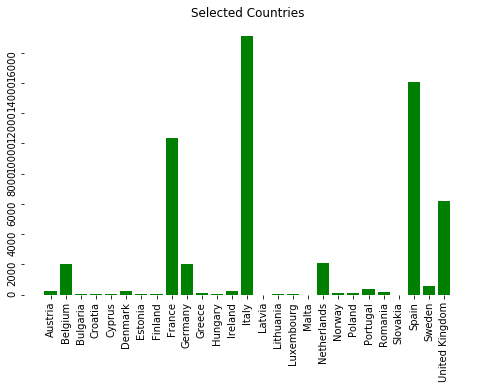

In [22]:
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(df_who_lastday_sel.Country,
       df_who_lastday_sel.Deaths,
       color='g');
ax.tick_params(labelrotation=90);
ax.set_title("Selected Countries");
ax.set_frame_on(False);
 
plt.show()    

In [23]:
# rename hdi table's name from geo to Country
hdi_score.rename(columns={'geo':'Country'}, inplace=True)


In [65]:
# Merge hdi index and death values based on Countries
hdi_combined = pd.merge(hdi_score, df_who_lastday_sel, on="Country")
hdi_combined

,Country,HDI_score_2017,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,Norway,0.954,NO,60.47,8.47,6086,89,32,0,2020-04-07 00:00:00+00:00,2abc0f85-1950-4d1e-b364-1be2242c1e19,NaN,NaN,NaN
1,Ireland,0.942,IE,53.41,-8.24,5709,210,25,0,2020-04-07 00:00:00+00:00,9d330a1e-5c20-4205-b20a-88ef0977e936,NaN,NaN,NaN
2,Germany,0.939,DE,51.17,10.45,107663,2016,36081,0,2020-04-07 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
3,Sweden,0.937,SE,60.13,18.64,7693,591,205,0,2020-04-07 00:00:00+00:00,d6e8b61f-589a-4d3b-8d5d-5b01b31d44b6,NaN,NaN,NaN
4,Netherlands,0.933,NL,52.13,5.29,19580,2101,250,0,2020-04-07 00:00:00+00:00,4fd2b0ff-7680-4fb5-8d0c-ffd01b49d849,NaN,NaN,NaN
5,Denmark,0.930,DK,56.26,9.50,5071,203,1491,0,2020-04-07 00:00:00+00:00,761966af-c2cf-4bd9-a375-2c4198cff021,NaN,NaN,NaN
6,Finland,0.925,FI,61.92,25.75,2308,34,300,0,2020-04-07 00:00:00+00:00,bc1adb31-d848-4cfd-a898-194fe9376367,NaN,NaN,NaN
7,United Kingdom,0.920,GB,55.38,-3.44,55242,6159,135,0,2020-04-07 00:00:00+00:00,32aadebc-ff17-40f7-9e6a-1277168074f9,NaN,NaN,NaN
8,Belgium,0.919,BE,50.50,4.47,22194,2035,4157,0,2020-04-07 00:00:00+00:00,1c49b6bb-1b83-4fe3-b536-da1731fe6953,NaN,NaN,NaN
9,Austria,0.914,AT,47.52,14.55,12639,243,4046,0,2020-04-07 00:00:00+00:00,39ca28f2-2ade-49f4-9516-e9b8cd8f48e6,NaN,NaN,NaN


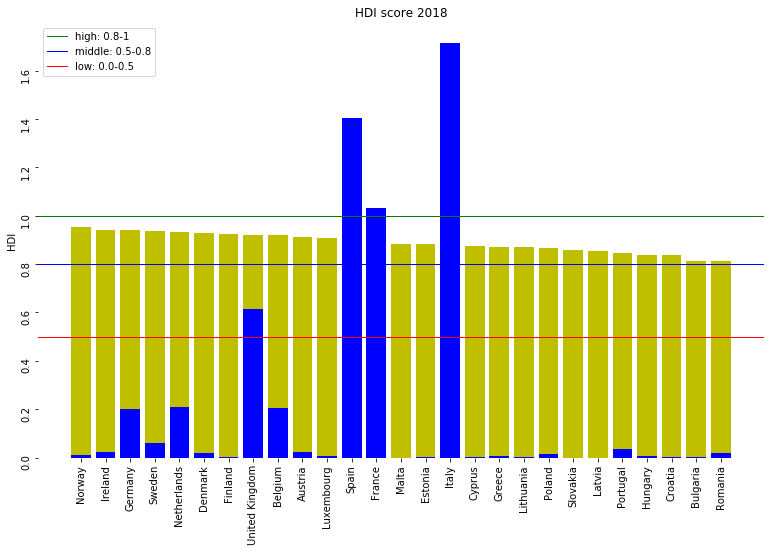

In [66]:
#hdi_score.set_index("geo")
fig, ax = plt.subplots(figsize = (13,8))

ax.bar(hdi_combined["Country"],
       hdi_combined["HDI_score_2017"],
       color = 'y');
ax.bar(hdi_combined["Country"],
       hdi_combined["Deaths"]/10000,
       color = 'b');
ax.tick_params(labelrotation=90)
ax.set_title("HDI score 2018")
ax.set_ylabel("HDI")
ax.set_frame_on(False)

plt.axhline(y=1, xmin=0.0, xmax=1, label = "high: 0.8-1", linewidth=1, color = 'g', );
plt.axhline(y=.8, xmin=0.0, xmax=1, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
plt.axhline(y=.5, xmin=0.0, xmax=1, label = "low: 0.0-0.5", linewidth=1, color = 'r', );

plt.legend(loc="upper left");

plt.savefig("HDI-Deaths.png") # save as png

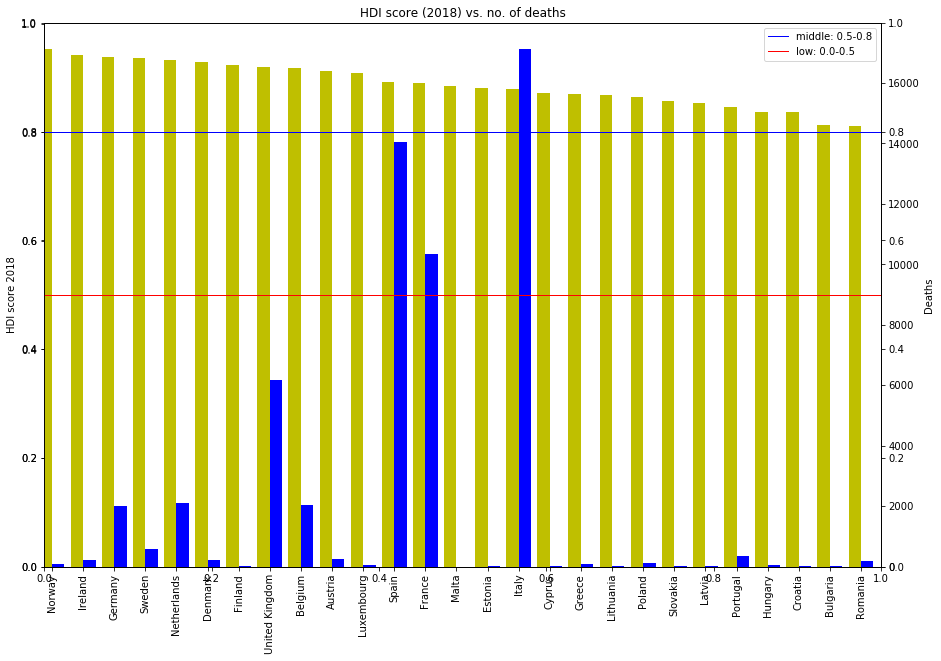

In [102]:
## The best plot sofar for the HDI

#hdi_combined = hdi_combined['Deaths'].div(10000)

fig, ax = plt.subplots(figsize = (15,10))

#fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.




width = 0.4



hdi_combined.HDI_score_2017.plot(kind='bar', color='y', ax=ax, width=width, position=1)
hdi_combined.Deaths.plot(kind='bar', color='b', ax=ax2, width=width, position=0)

#plt.axhline(y=1,  label = "high: 0.8-1", linewidth=1, color = 'g', );
plt.axhline(y=.8, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );


#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );

#plt.ylim(0,11)



ax.set_xticklabels(hdi_combined.Country, rotation=90)
ax2.set_xticklabels(hdi_combined.Country, rotation=90)



ax.set_ylabel('HDI score 2018')
ax2.set_ylabel('Deaths')
#ax.tick_params(labelrotation=90)
ax.set_title("HDI score (2018) vs. no. of deaths")
ax.set_frame_on(False)



plt.legend(loc="upper right");

plt.savefig("HDI-Deaths2.png") # save as png

In [ ]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])

df2.plot.bar();


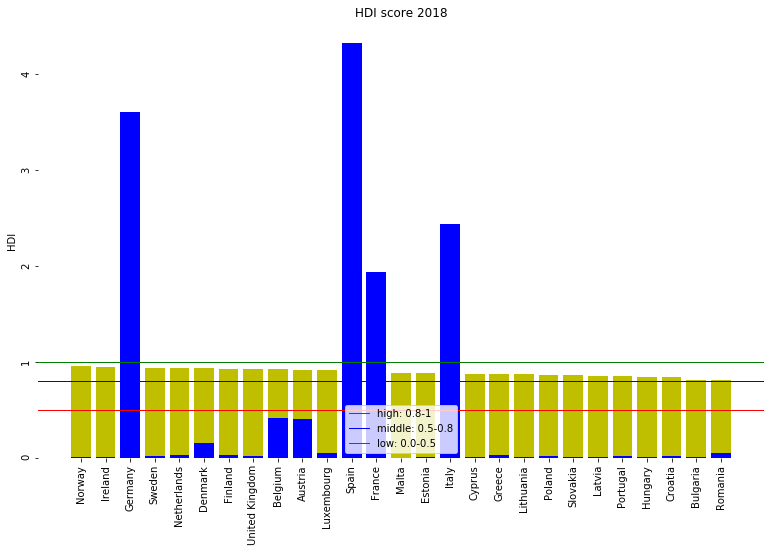

In [28]:
fig, ax = plt.subplots(figsize = (13,8))

ax.bar(hdi_combined["Country"],
       hdi_combined["HDI_score_2017"],
       color = 'y');
ax.bar(hdi_combined["Country"],
       hdi_combined["Recovered"]/10000,
       color = 'b');
ax.tick_params(labelrotation=90)
ax.set_title("HDI score 2018")
ax.set_ylabel("HDI")
ax.set_frame_on(False)

plt.axhline(y=1, xmin=0.0, xmax=1, label = "high: 0.8-1", linewidth=1, color = 'g', );
plt.axhline(y=.8, xmin=0.0, xmax=1, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
plt.axhline(y=.5, xmin=0.0, xmax=1, label = "low: 0.0-0.5", linewidth=1, color = 'r', );

plt.legend(loc="lower center");

plt.savefig("HDI-Recovered.png") # save as png

In [29]:
# Joined EUROSTAT data from MySQL (From Thomas)

In [30]:
df_Eurostat = pd.read_csv("master_stats.csv")
df_Eurostat

,Unnamed: 0,gdp_per_head_2018,air_transport_passengers_2018,population_density_2018,practPHYSICIANSp100kinh,health_exp_in_€_pH,deaths_pneumo_2016,death_rate_chronic_diseases,total_nights_spent_hotels_2018,total_population_2018,Country,Confirmed,Deaths,Recovered
0,0,37810.0,31138417,107.1,518.28,4371.34,11.33,103.7,125229170.0,8822267,Austria,12639,243,4046
1,1,35600.0,34506294,375.3,308.29,3991.58,35.27,99.3,41320284.0,11398589,Belgium,22194,2035,4157
2,2,6550.0,12137714,63.9,424.49,591.11,18.98,193.9,26845013.0,7050034,Bulgaria,577,23,42
3,3,23770.0,10927101,94.4,386.84,1527.71,12.49,82.4,17164182.0,864236,Cyprus,494,9,47
4,4,35860.0,222422361,234.7,424.88,4459.36,20.94,112.0,419556284.0,82792351,Germany,107663,2016,36081
5,5,48260.0,34701139,138.0,NaN,5134.04,35.21,108.9,33280395.0,5781190,Denmark,5071,203,1491
6,6,15090.0,2995528,30.4,346.82,1152.52,19.32,155.8,6630315.0,1319133,Estonia,1149,21,69
7,7,24880.0,220611429,93.1,387.68,2221.11,17.97,94.7,466940717.0,46658447,Spain,141942,14045,43208
8,8,36850.0,22173530,18.1,NaN,3742.34,2.88,101.0,22235084.0,5513130,Finland,2308,34,300
9,9,32830.0,161991179,105.6,315.80,3883.02,17.89,101.8,442760050.0,66926166,France,109069,10328,19337


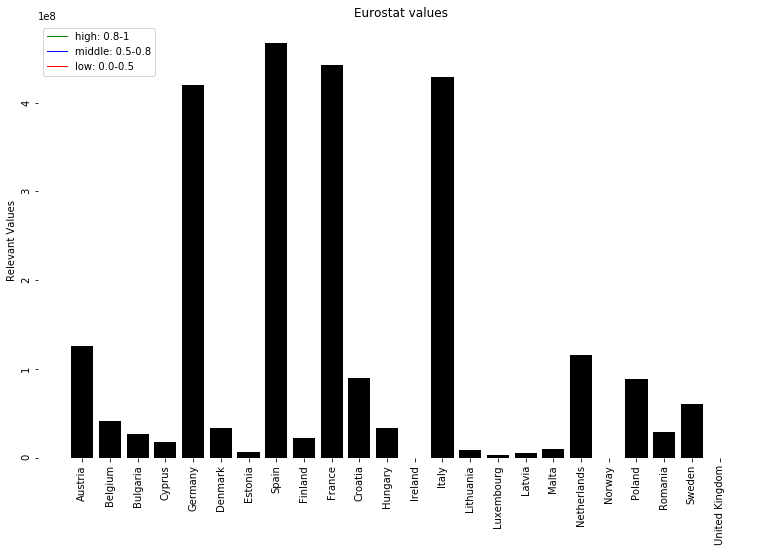

In [31]:
fig, ax = plt.subplots(figsize = (13,8))

ax.bar(df_Eurostat["Country"],
       df_Eurostat["Confirmed"],
       color = 'yellow');

#ax.bar(df_Eurostat["Country"],
#       df_Eurostat["Confirmed"],
#       color = 'b');

ax.bar(df_Eurostat["Country"],
       df_Eurostat["total_nights_spent_hotels_2018"],
       color = 'black');


#ax.bar(df_Eurostat["Country"],
#       df_Eurostat["air_transport_passengers_2018"],
#       color = 'orange');



# ax.bar(df_Eurostat["Country"],
#        df_Eurostat["population_density_2018"],
#        color = 'purple');



#ax.bar(df_Eurostat["Country"],
#       df_Eurostat["gdp_per_head_2018"],
#       color = 'pink');






ax.tick_params(labelrotation=90)
ax.set_title("Eurostat values")
ax.set_ylabel("Relevant Values")
ax.set_frame_on(False)

plt.axhline(y=1, xmin=0.0, xmax=1, label = "high: 0.8-1", linewidth=1, color = 'g', );
plt.axhline(y=.8, xmin=0.0, xmax=1, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
plt.axhline(y=.5, xmin=0.0, xmax=1, label = "low: 0.0-0.5", linewidth=1, color = 'r', );

plt.legend(loc="upper left");



In [32]:
# Normalise data

cols_to_norm = ['gdp_per_head_2018' ,  'air_transport_passengers_2018' ,  'population_density_2018' , 
                'practPHYSICIANSp100kinh' ,  'health_exp_in_€_pH' ,  'deaths_pneumo_2016' ,  
                'death_rate_chronic_diseases' ,  'total_nights_spent_hotels_2018' ,  'total_population_2018' , 
                'Confirmed' ,  'Deaths' ,  'Recovered']
df_Eurostat[cols_to_norm] = df_Eurostat[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_Eurostat

,Unnamed: 0,gdp_per_head_2018,air_transport_passengers_2018,population_density_2018,practPHYSICIANSp100kinh,health_exp_in_€_pH,deaths_pneumo_2016,death_rate_chronic_diseases,total_nights_spent_hotels_2018,total_population_2018,Country,Confirmed,Deaths,Recovered
0,0,0.406396,0.104545,0.058716,1.000000,0.594742,0.181369,0.151515,0.263585,0.101396,Austria,0.087159,0.014188,0.093535
1,1,0.377665,0.117056,0.233884,0.251453,0.536495,0.695214,0.124848,0.082755,0.132694,Belgium,0.154615,0.118818,0.096104
2,2,0.000000,0.033961,0.030501,0.665669,0.014929,0.345568,0.698182,0.051560,0.079866,Bulgaria,0.002005,0.001343,0.000856
3,3,0.223869,0.029464,0.050421,0.531458,0.158585,0.206267,0.022424,0.030697,0.004720,Cyprus,0.001419,0.000525,0.000972
4,4,0.381045,0.815123,0.142055,0.667059,0.608243,0.387637,0.201818,0.897883,1.000000,Germany,0.758000,0.117709,0.835035
5,5,0.542252,0.117780,0.078898,NaN,0.711726,0.693926,0.183030,0.065428,0.064452,Denmark,0.033731,0.011853,0.034396
6,6,0.111024,0.000000,0.008621,0.388800,0.101038,0.352865,0.467273,0.007995,0.010246,Estonia,0.006043,0.001226,0.001481
7,7,0.238300,0.808396,0.049572,0.534453,0.264939,0.323889,0.096970,1.000000,0.561038,Spain,1.000000,0.820050,1.000000
8,8,0.393916,0.071242,0.000588,NaN,0.498266,0.000000,0.135152,0.041625,0.061196,Finland,0.014225,0.001985,0.006828
9,9,0.341654,0.590635,0.057736,0.278223,0.519844,0.322172,0.140000,0.947889,0.807254,France,0.767926,0.603024,0.447469


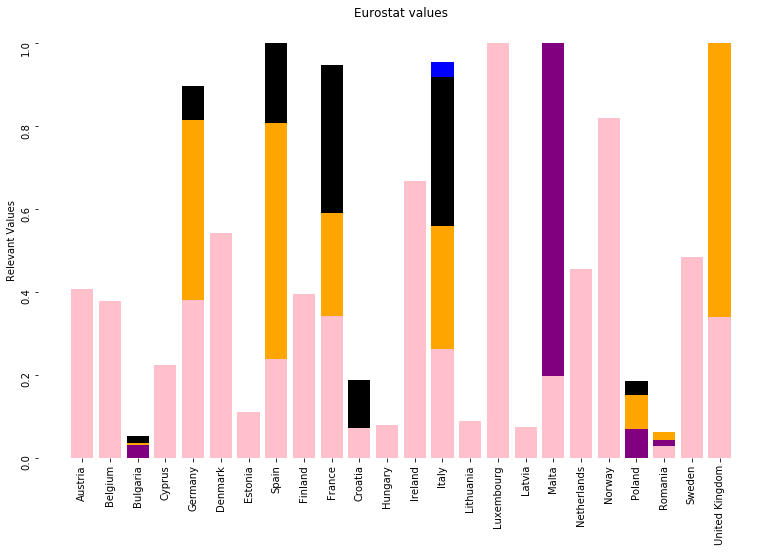

In [36]:
# Plot Normalized data

fig, ax = plt.subplots(figsize = (13,8))

ax.bar(df_Eurostat["Country"],
       df_Eurostat["Confirmed"],
       color = 'yellow');

ax.bar(df_Eurostat["Country"],
       df_Eurostat["Confirmed"],
       color = 'b');

ax.bar(df_Eurostat["Country"],
       df_Eurostat["total_nights_spent_hotels_2018"],
       color = 'black');


ax.bar(df_Eurostat["Country"],
       df_Eurostat["air_transport_passengers_2018"],
       color = 'orange');



ax.bar(df_Eurostat["Country"],
        df_Eurostat["population_density_2018"],
        color = 'purple');



ax.bar(df_Eurostat["Country"],
       df_Eurostat["gdp_per_head_2018"],
       color = 'pink');






ax.tick_params(labelrotation=90)
ax.set_title("Eurostat values")
ax.set_ylabel("Relevant Values")
ax.set_frame_on(False)

#plt.axhline(y=1, xmin=0.0, xmax=1, label = "high: 0.8-1", linewidth=1, color = 'g', );
#plt.axhline(y=.8, xmin=0.0, xmax=1, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
#plt.axhline(y=.5, xmin=0.0, xmax=1, label = "low: 0.0-0.5", linewidth=1, color = 'r', );

#plt.legend(loc="upper left");



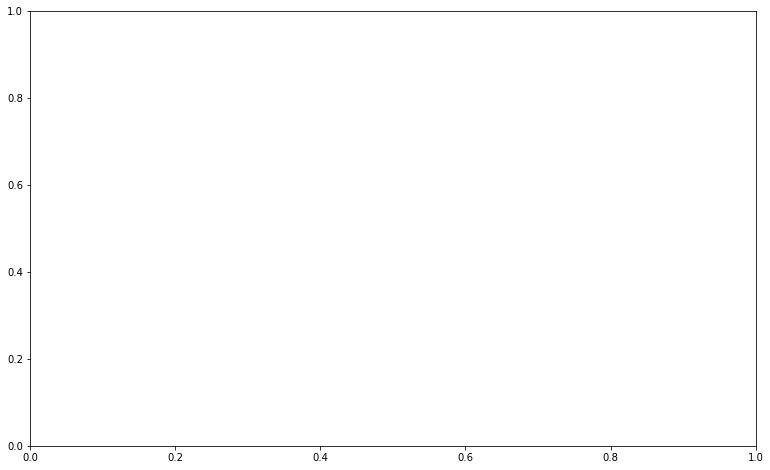

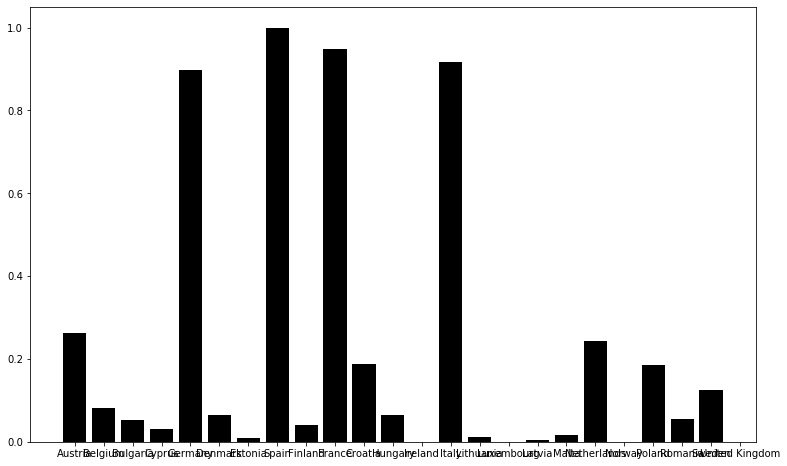

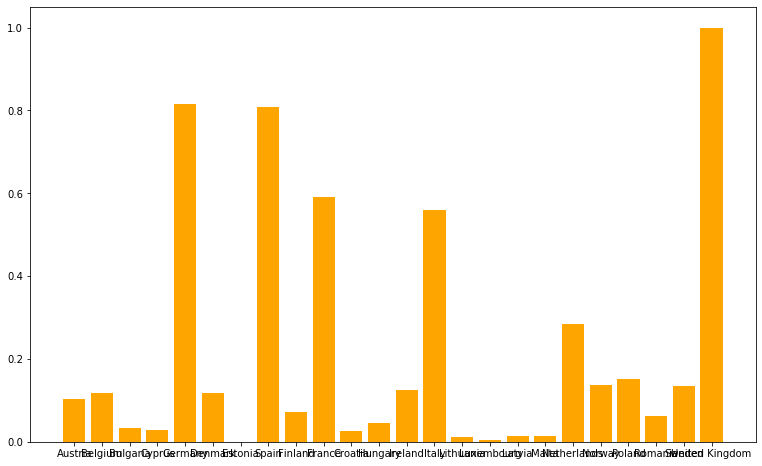

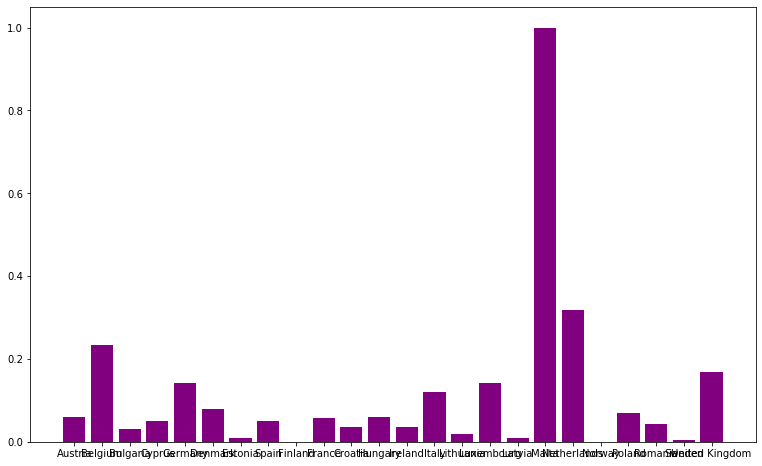

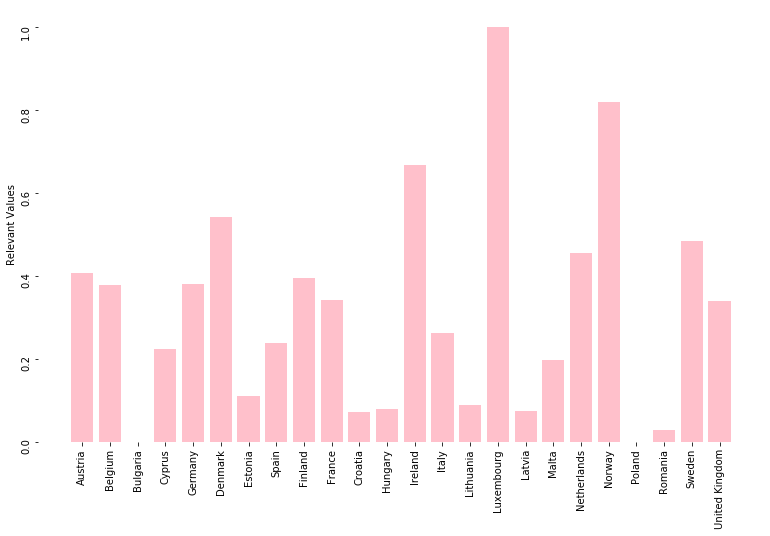

In [104]:
# Plot Normalized data bellow each other

#fig, ax = plt.subplots(figsize = (13,8))

fig, ax = plt.subplots(figsize = (13,8))

#fig, ax = plt.subplots()

#fig, ax = plt.subplots(3)



fig, ax = plt.subplots(figsize = (13,8))


ax.bar(df_Eurostat["Country"],
        df_Eurostat["total_nights_spent_hotels_2018"],
        color = 'black');

fig, ax = plt.subplots(figsize = (13,8))


ax.bar(df_Eurostat["Country"],
        df_Eurostat["air_transport_passengers_2018"],
        color = 'orange');

fig, ax = plt.subplots(figsize = (13,8))


ax.bar(df_Eurostat["Country"],
         df_Eurostat["population_density_2018"],
         color = 'purple');

fig, ax = plt.subplots(figsize = (13,8))


ax.bar(df_Eurostat["Country"],
        df_Eurostat["gdp_per_head_2018"],
        color = 'pink');


#axs[0].plot(x, y)
#axs[1].plot(x, -y)




ax.tick_params(labelrotation=90)
ax.set_ylabel("Relevant Values")
ax.set_frame_on(False)

#plt.axhline(y=1, xmin=0.0, xmax=1, label = "high: 0.8-1", linewidth=1, color = 'g', );
#plt.axhline(y=.8, xmin=0.0, xmax=1, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
#plt.axhline(y=.5, xmin=0.0, xmax=1, label = "low: 0.0-0.5", linewidth=1, color = 'r', );

#plt.legend(loc="upper left");



In [ ]:
## The best plot sofar for the HDI

#hdi_combined = hdi_combined['Deaths'].div(10000)



#hotels death/100000 population



ax.bar(df_Eurostat["Country"],
       df_Eurostat["Deaths"],
       color = 'yellow');

ax.set_title("Deaths")
ax.tick_params(labelrotation=90)
ax.set_ylabel("Relevant Values")
ax.set_frame_on(False)



fig, ax = plt.subplots(figsize = (13,8))


ax.bar(df_Eurostat["Country"],
       df_Eurostat["Confirmed"],
       color = 'b');

ax.set_title("Confirmed")








fig, ax = plt.subplots(figsize = (15,10))

#fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.
ax3 = ax.twinx() # Create another axes that shares the same x-axis as ax.




width = 0.4



hdi_combined.HDI_score_2017.plot(kind='bar', color='y', ax=ax, width=width, position=1)
hdi_combined.Deaths.plot(kind='bar', color='b', ax=ax2, width=width, position=0)

#plt.axhline(y=1,  label = "high: 0.8-1", linewidth=1, color = 'g', );
plt.axhline(y=.8, label = "middle: 0.5-0.8", linewidth=1, color = 'b', );
plt.axhline(y=.5, label = "low: 0.0-0.5", linewidth=1, color = 'r', );


#plt.axhline(y=1,  ax = ax2, label = "high: 0.8-1", linewidth=1, color = 'g' );
#plt.axhline(y=.8, ax = ax2, label = "middle: 0.5-0.8", linewidth=1, color = 'b' );
#plt.axhline(y=.5, ax = ax3, label = "low: 0.0-0.5", linewidth=1, color = 'r' );

#plt.ylim(0,11)



ax.set_xticklabels(hdi_combined.Country, rotation=90)
ax2.set_xticklabels(hdi_combined.Country, rotation=90)



ax.set_ylabel('HDI score 2018')
ax2.set_ylabel('Deaths')
#ax.tick_params(labelrotation=90)
ax.set_title("HDI score (2018) vs. no. of deaths")
ax.set_frame_on(False)



plt.legend(loc="upper right");

plt.savefig("HDI-Deaths2.png") # save as png

Colunm Name :  Unnamed: 0
Column Contents :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Colunm Name :  gdp_per_head_2018
Column Contents :  [0.40639626 0.37766511 0.         0.22386895 0.38104524 0.54225169
 0.11102444 0.23829953 0.39391576 0.34165367 0.07072283 0.07813313
 0.66835673 0.2624805  0.08788352 1.         0.07267291 0.19656786
 0.4548882  0.81877275        nan 0.02847114 0.48439938 0.3399636 ]
Colunm Name :  air_transport_passengers_2018
Column Contents :  [0.10454476 0.1170557  0.03396125 0.02946408 0.81512338 0.11777951
 0.         0.80839615 0.07124214 0.59063456 0.02502192 0.04524966
 0.12388612 0.55854353 0.01210518 0.00368981 0.0150135  0.0141544
 0.28473275 0.13757547 0.15145926 0.06246081 0.13354489 1.        ]
Colunm Name :  population_density_2018
Column Contents :  [5.87159558e-02 2.33884136e-01 3.05009470e-02 5.04212658e-02
 1.42054732e-01 7.88975247e-02 8.62125269e-03 4.95722030e-02
 5.87812684e-04 5.77362680e-02 3.65750114e-02 5.

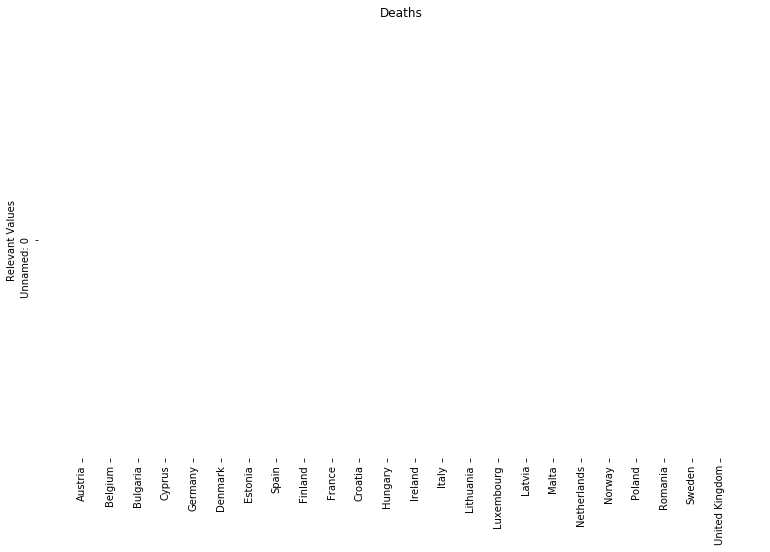

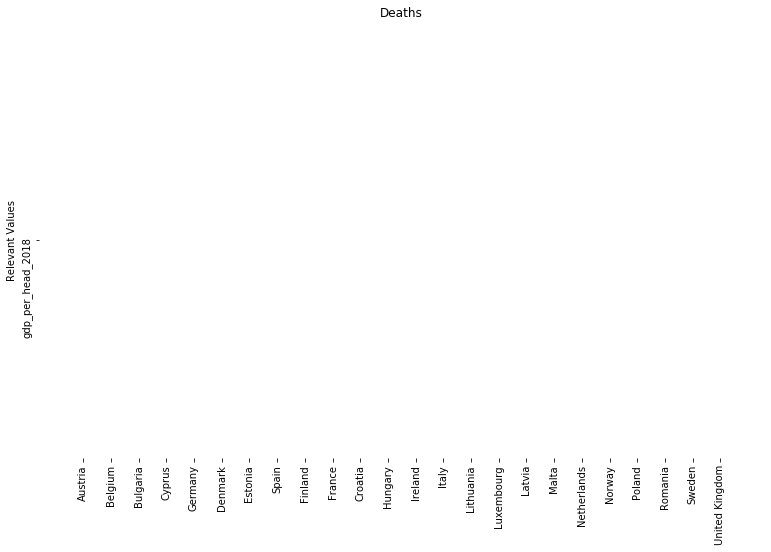

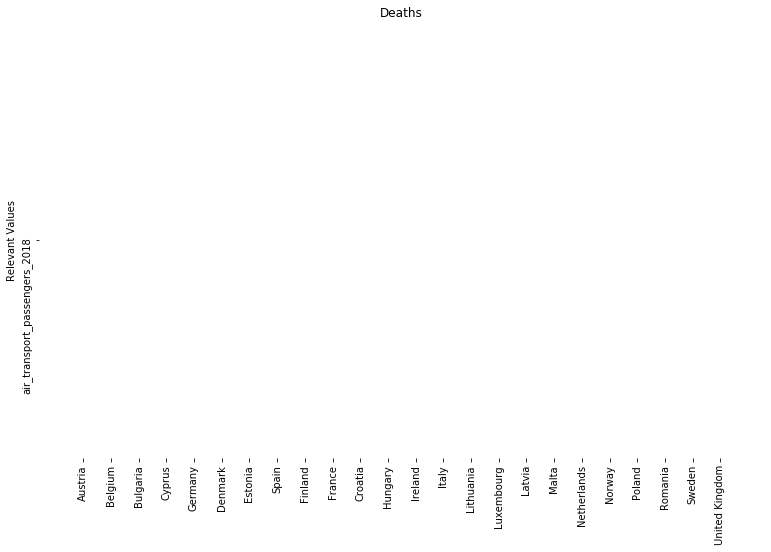

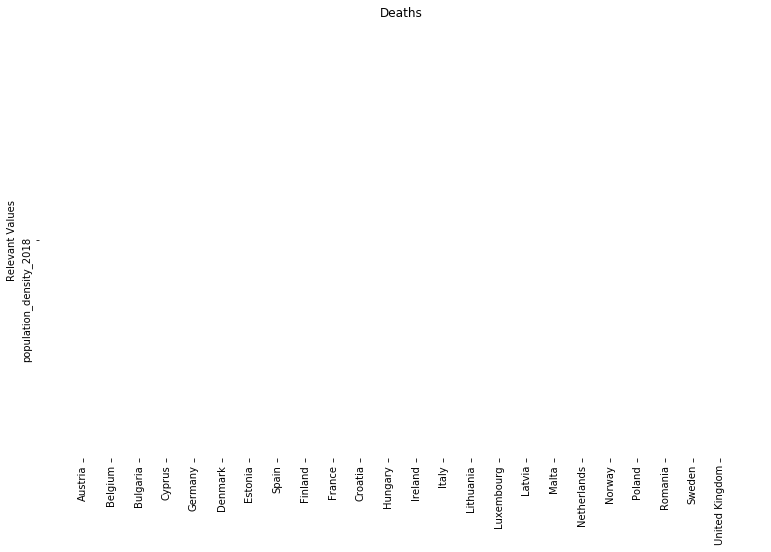

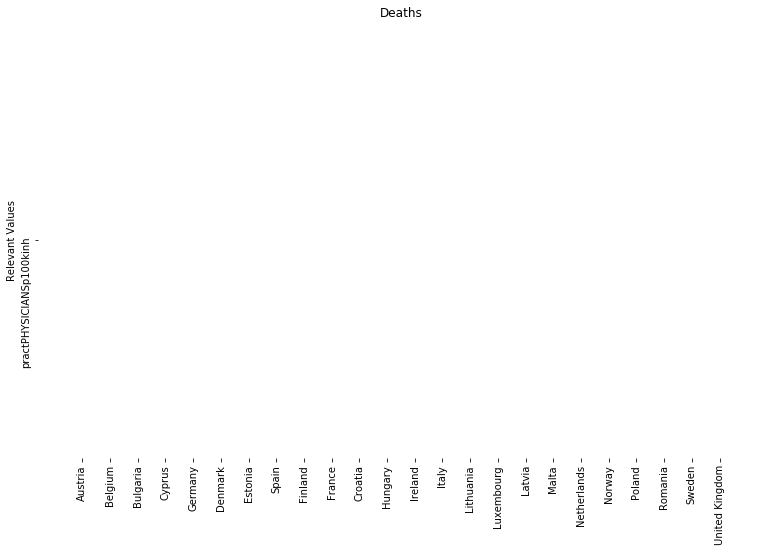

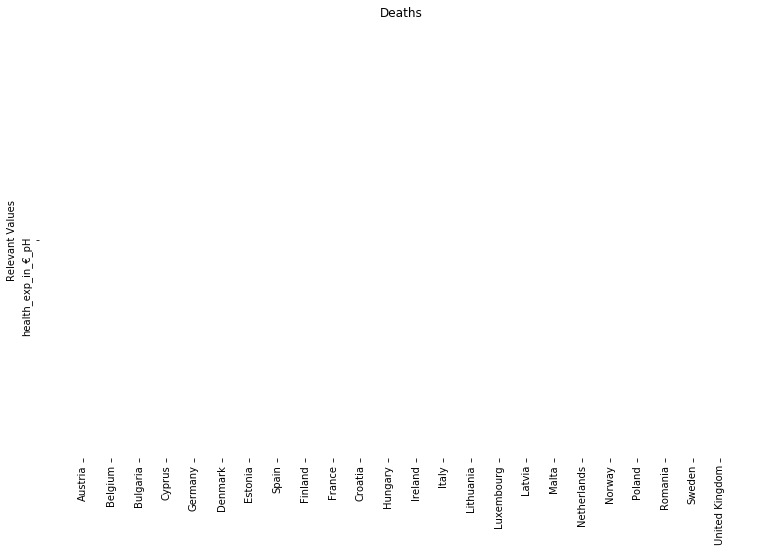

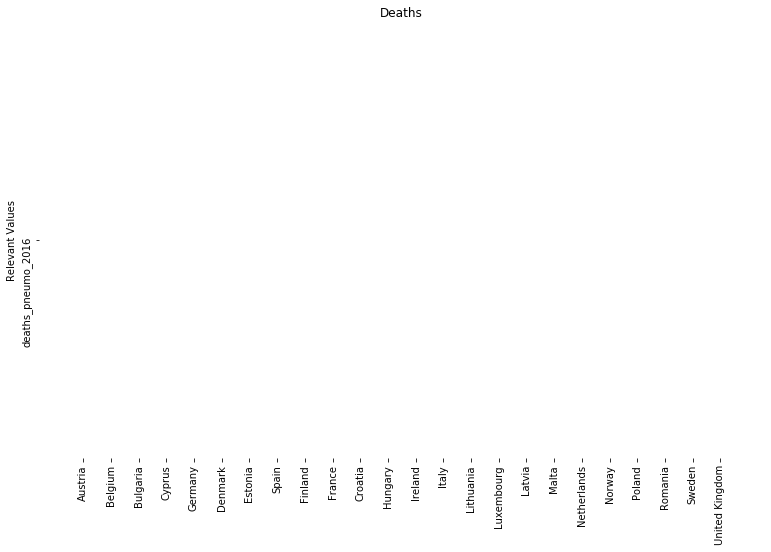

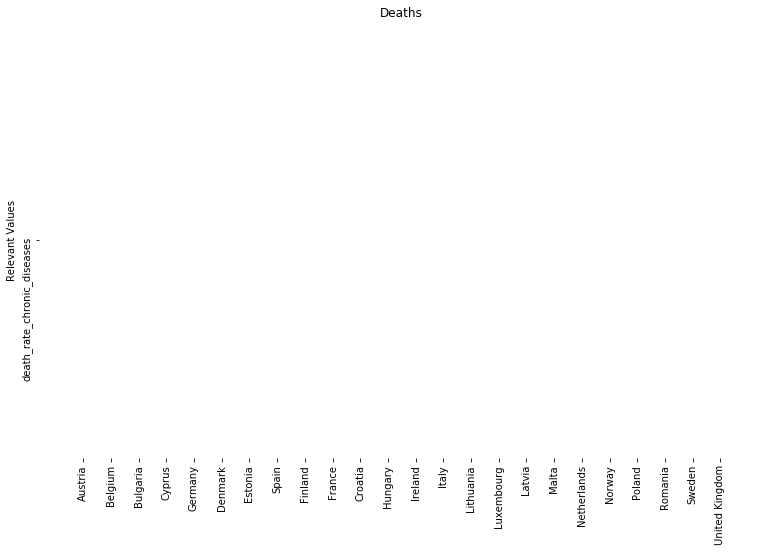

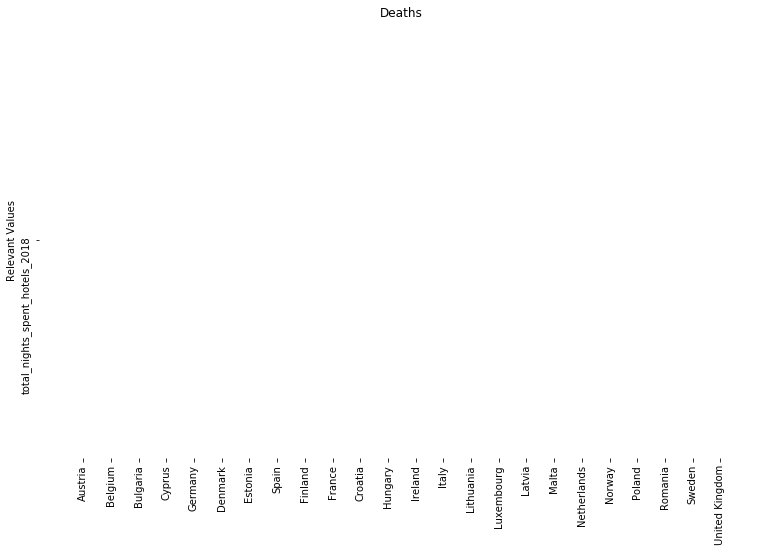

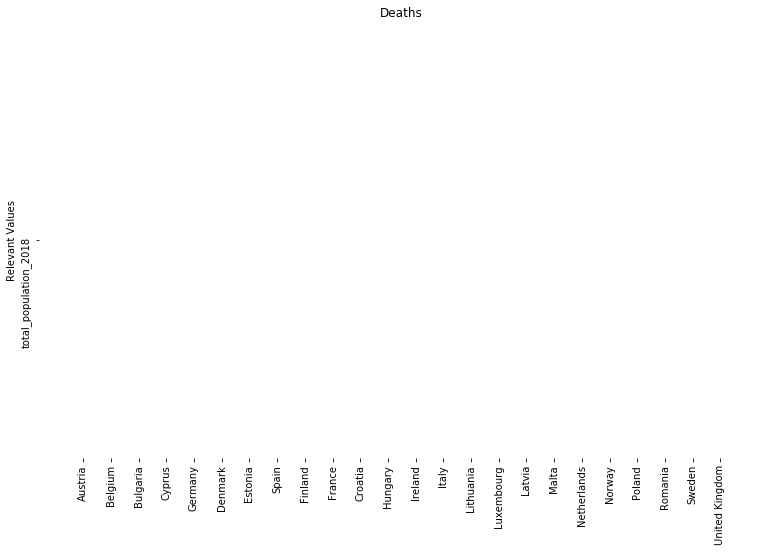

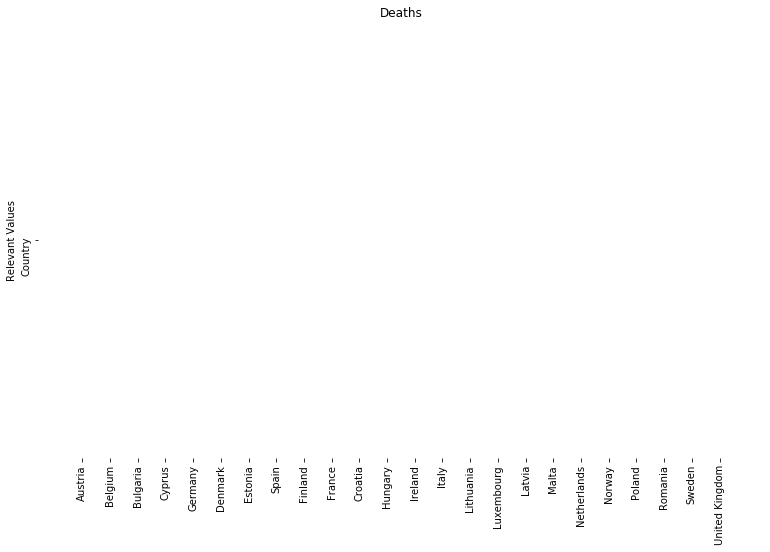

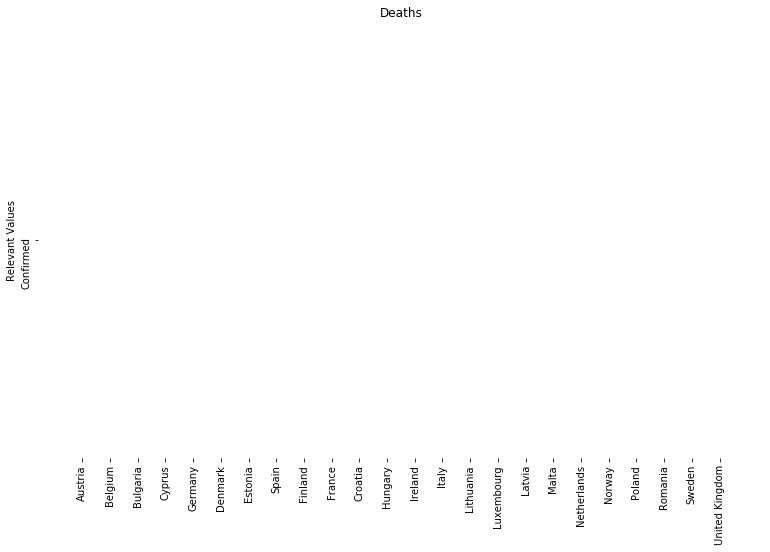

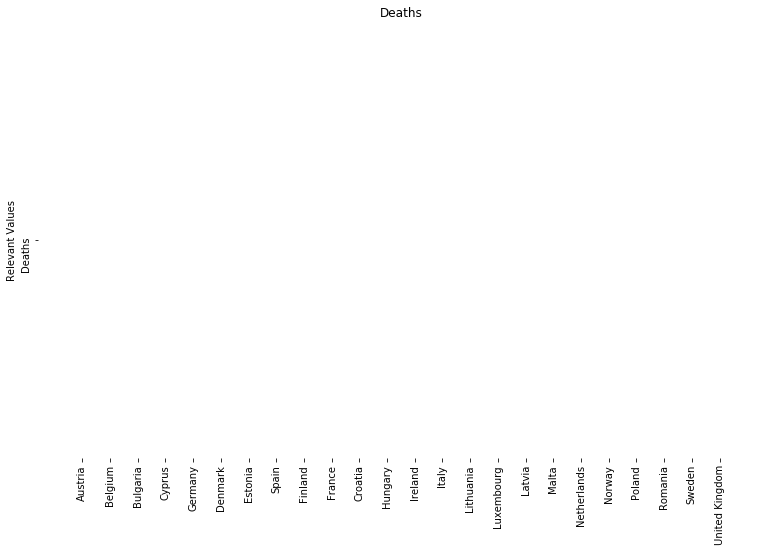

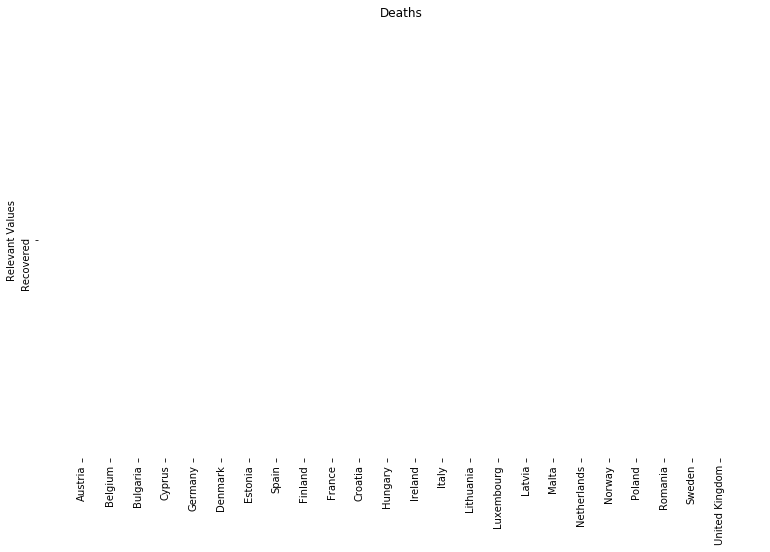

In [48]:

# Iterate over the sequence of column names
for column in df_Eurostat:
    
    # Select column contents by column name using [] operator
    columnSeriesObj = df_Eurostat[column]
    print('Colunm Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)
    
    fig, ax = plt.subplots(figsize = (13,8))

    ax.bar(df_Eurostat["Country"],
           column,
           color = 'yellow');

    ax.set_title("Deaths")
    ax.tick_params(labelrotation=90)
    ax.set_ylabel("Relevant Values")
    ax.set_frame_on(False)




    ax.tick_params(labelrotation=90)
    ax.set_ylabel("Relevant Values")
    ax.set_frame_on(False)


    
    
    

In [ ]:
# Plot Normalized data bellow each other automatically


fig, ax = plt.subplots(figsize = (13,8))



ax.bar(df_Eurostat["Country"],
       df_Eurostat["Deaths"],
       color = 'yellow');

ax.set_title("Deaths")
ax.tick_params(labelrotation=90)
ax.set_ylabel("Relevant Values")
ax.set_frame_on(False)




ax.tick_params(labelrotation=90)
ax.set_ylabel("Relevant Values")
ax.set_frame_on(False)




In [365]:
# Get data and plot it from EUROSTAT Automatically (Independent from MySQL)

In [366]:

Eurostat_title =  "Tourism"
json_RQST = 'tin00173?precision=1&unit=PC&accommod=BEDPL&shortLabel=1'

#Eurostat_title =  "Eurostat population density 2018"
#json_RQST = "tps00003?unit=PER_KM2&precision=1&time=2018"

#Eurostat_title =  "Eurostat air transport passengers 2018"
#json_RQST = "ttr00012?tra_meas=PAS_CRD&precision=1&tra_cov=TOTAL&schedule=TOT&unit=PAS&time=2018"

#Eurostat_title =  "Eurostat gdp/head 2018"
#json_RQST = "nama_10_pc?na_item=B1GQ&precision=1&unit=CLV10_EUR_HAB&time=2018"

#Eurostat_title =  "Eurostat health euro expenditure per capita and totals 2017"
#json_RQST = "tps00207?precision=1&unit=EUR_HAB&unit=MIO_EUR&unit=PC_GDP&icha11_hc=TOT_HC&time=2017"

#Eurostat_title = "Eurostat total nights spent by residents/non residents 2018"
#json_RQST = "tin00175?c_resid=FOR&c_resid=NAT&c_resid=TOTAL&precision=1&unit=NR&time=2018&nace_r2=I551-I553"

#Eurostat_title = "Eurostat total deaths by pnomonia 2016"
#json_RQST = "tps00128?precision=1&sex=F&sex=M&sex=T&unit=RT&time=2016&age=TOTAL&icd10=J12-J18"

#Eurostat_title = "Eurostat Standardised death rate due to chronic diseases by sex"
#json_RQST = "sdg_03_40?sex=F&sex=M&sex=T&precision=1&time=2016"

#Eurostat_title = "Eurostat Total Population in January1 st 2018"
#json_RQST = "proj_18np?precision=1&age=TOTAL"

#Eurostat_title = "Eurostat # of practising physicians per 100k inhabitants 2017"
#json_RQST = "tps00044?precision=1&isco08=OC221&unit=P_HTHAB&wstatus=PRACT&time=2017"

#Eurostat_title =  "Eurostat Share of people with good or very good perceived health by sex above 16 2019"
#json_RQST = "sdg_03_20?precision=1&sex=F&sex=M&sex=T&unit=PC&quantile=TOTAL&time=2019&age=Y_GE16&levels=VG_G"


base = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"
url = base + json_RQST


In [367]:

def eurostat(url):
    from pyjstat import pyjstat
    from collections import OrderedDict
    # read from json-stat
    dataset = pyjstat.Dataset.read(url)
    # write to dataframe
    df = dataset.write('dataframe')
    return df
    #example from query builder    

df = eurostat(url)


#### Display dataset ##########
print ("Dataset for" , Eurostat_title)    
df

Dataset for Tourism


,accommod,unit,geo,time,value
0,Bedplaces,Percentage,Austria,2019M03,53.4
1,Bedplaces,Percentage,Austria,2019M04,34.8
2,Bedplaces,Percentage,Austria,2019M05,33.5
3,Bedplaces,Percentage,Austria,2019M06,48.3
4,Bedplaces,Percentage,Austria,2019M07,59.3
...,...,...,...,...,...
475,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M10,15.8
476,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M11,15.7
477,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M12,15.5
478,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2020M01,NaN


Dataset for Tourism
Countries with the highest values in blue:


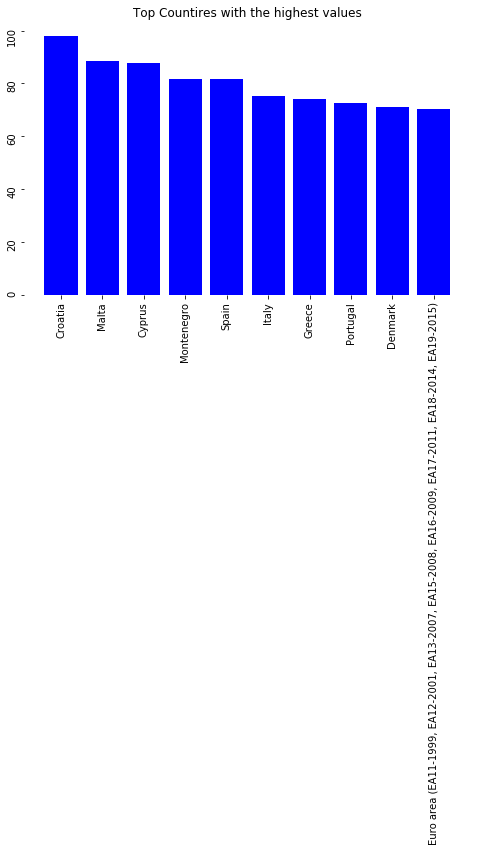

Dataset for month March, Tourism


,accommod,unit,geo,time,value
0,Bedplaces,Percentage,Austria,2019M03,53.40
12,Bedplaces,Percentage,Belgium,2019M03,43.37
24,Bedplaces,Percentage,Bulgaria,2019M03,27.30
36,Bedplaces,Percentage,Switzerland,2019M03,39.00
48,Bedplaces,Percentage,Cyprus,2019M03,48.90
60,Bedplaces,Percentage,Czechia,2019M03,46.50
72,Bedplaces,Percentage,Germany (until 1990 former territory of the FRG),2019M03,39.91
84,Bedplaces,Percentage,Denmark,2019M03,39.00
96,Bedplaces,Percentage,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",2019M03,41.84
108,Bedplaces,Percentage,Estonia,2019M03,37.00


Dataset for Tourism
Countries with the highest values in month March are:


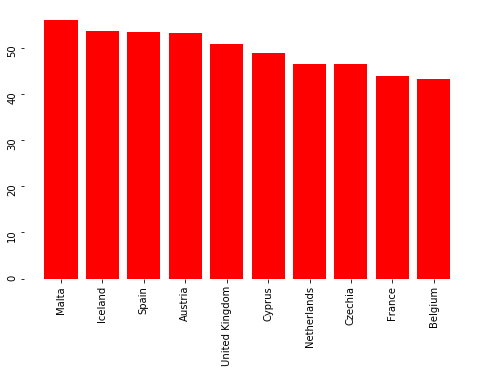

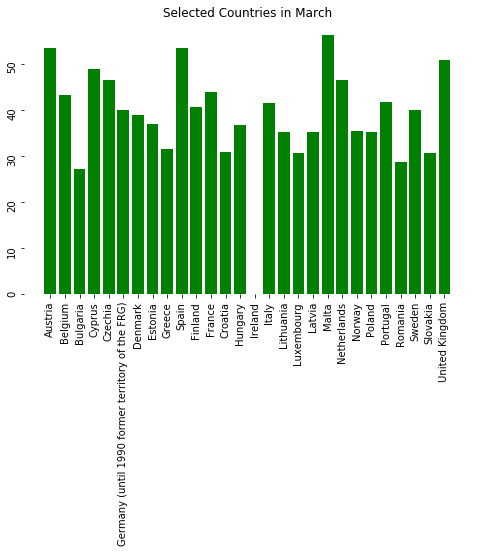

In [368]:

#all in one block



def Eurostat_Max_Unique (df):

    Eurostat_Max_noDuplicate = df.sort_values('value', ascending=False).drop_duplicates(['geo'])
    return Eurostat_Max_noDuplicate



def Eurostat_March (df):
    
    Eurostat_March = df[df['time']=="2019M03"]
    return Eurostat_March



def Eurostat_rating (df, countries_sel):
    
    Eurostat_rating_sel = df[df.geo.str.contains('|'.join(countries_sel))]
    return Eurostat_rating_sel
    


def Eurostat_rating_March (df, countries_sel):
    
    df_March = df[df['time']=="2019M03"]
    Eurostat_rating_sel_March = df_March[df_March.geo.str.contains('|'.join(countries_sel))]
    return Eurostat_rating_sel_March




#def top_n_cats (df, n):
#    top_n = (Eurostat_Max_Unique (df,n)
#            .sort_values("value", ascending=False)
#            .reset_index()
#            .head(n))
#    return top_n



#display(df)


top_10_cats = (Eurostat_Max_Unique (df)
               .sort_values("value", ascending=False)
               .reset_index()
               .head(10))



#### Plot countries with the highest values ##########



print ("Dataset for" , Eurostat_title)
print ("Countries with the highest values in blue:")


fig1, ax = plt.subplots(figsize=(8,5))

ax.bar(top_10_cats["geo"],
      top_10_cats["value"],
       color='b');
ax.tick_params(labelrotation=90);
ax.set_title("Top Countires with the highest values");
ax.set_frame_on(False);

plt.show()


#### Does Data for March exist? Then plot it otherwise  ##########



if ('2019M03' in df['time'].values):

    print ("Dataset for month March," , Eurostat_title)
    display(Eurostat_March (df))
    
    
    print ("Dataset for" , Eurostat_title)
    print ("Countries with the highest values in month March are:")
    
    


    top_10_cats_March = (Eurostat_March (df)
                   .sort_values("value", ascending=False)
                   .reset_index()
                   .head(10))

    fig, ax = plt.subplots(figsize=(8,5))

    ax.bar(top_10_cats_March["geo"],
          top_10_cats_March["value"],
           color='r');
    ax.tick_params(labelrotation=90);
    #ax.set_title("Top Countries with the highest Values in March");
    ax.set_frame_on(False);
    
    
    #plot the selected countries in March in green
    Eurostat_rating_March(df, countries_sel)

    fig, ax = plt.subplots(figsize=(8,5))

    ax.bar(Eurostat_rating_March(df, countries_sel)["geo"],
           Eurostat_rating_March(df, countries_sel)["value"],
           color='g');
    ax.tick_params(labelrotation=90);
    ax.set_title("Selected Countries in March");
    ax.set_frame_on(False);
    
    
else:

    
    #plot the selected countries in green 
    print ("Dataset for" , Eurostat_title)
    Eurostat_rating(df, countries_sel)

    fig, ax = plt.subplots(figsize=(8,5))

    ax.bar(Eurostat_rating(df, countries_sel)["geo"],
           Eurostat_rating(df, countries_sel)["value"],
           color='g');
    ax.tick_params(labelrotation=90);
    ax.set_title("Selected Countries");
    ax.set_frame_on(False);



